In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
np.set_printoptions(precision=4, linewidth=125)

## Generate test data

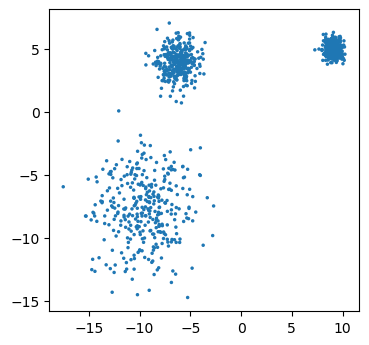

In [5]:
# Run this cell for 3 artificial clusters
N = 1000
centers = 3
#centers = [[1, 1], [-1, -1], [1, -1]]
#centers = [[6,7], [-7,0], [3,-5]]
X, y_true = make_blobs(n_samples=N,
                  n_features=2,
                  centers=centers,
                  cluster_std=[2.5, 1.0, 0.5],
                  center_box=(-10, 10),
                  shuffle=False, random_state=None)

# How many centers?
n_centers = len(np.unique(y_true))

# Compute centers
cx = [np.mean(X[y_true==yy,0]) for yy in range(n_centers)]
cy = [np.mean(X[y_true==yy,1]) for yy in range(n_centers)]

# Plot 'em
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='')
#ax.scatter(cx, cy, marker='x', s=50, edgecolor='', c='red', linewidths=0)
#ax.set_title('Original Data Points')
plt.show()

## Cluster the data using several different values of K

Suppose we don't know how many true clusters there are. Let's try several values of K.

In [7]:
# Run Kmeans for values of K from 2 to 10.
# Collect the SSE (using the inertia_ property) in an array for plotting later
SSE = []
for K in range(2,11):
    kmeans = KMeans(init='random', n_clusters=K)
    kmeans.fit(X)
    SSE = SSE + [kmeans.inertia_]
    print(kmeans.inertia_)

29657.887785835705
5178.445114024685
3775.3167086148046
2862.259724361874
2583.0069673845333
2160.770190985203
1915.23093823466
1734.2641551399372
1511.5585880579533


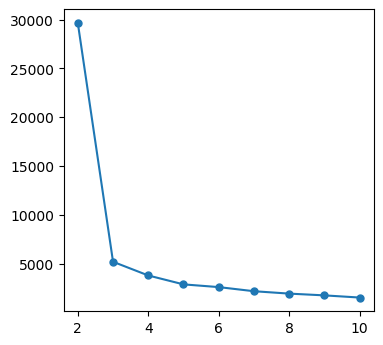

In [9]:
# Plot the SSE values we collected above
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(list(range(2,11)), SSE, marker='.', markersize=10)
#ax.set_title('SSE for different values of K')
plt.show()

## Determine "best" K and re-run

There is a pronounced "elbow" in the plot at $ K=3 $, so that appears
to be the optimal number of clusters.

We'll re-run our clustering with $K=3$, then plot the data again using the
found cluster labels to color the points.


In [6]:
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(X)
y = kmeans.predict(X)

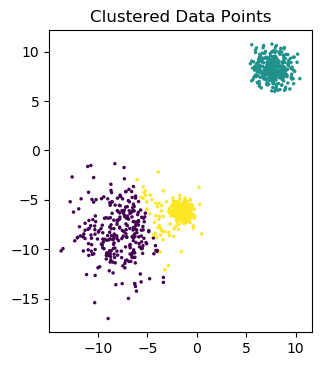

In [7]:
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1, aspect=1)
ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='', c=y)
ax.set_title('Clustered Data Points')
plt.show()